In [1]:
## Prepare data for enrichment analysis
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)

load(file = "~/project/NHPfetal/inte_all/load_files/Macaque.developing.seurat.Rdata")
## mac, subtype_order, subclass_order, 

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
mm <- filter(mac@meta.data, subclass %in%  c("Excitatory neurons", "enIPC") & cbnage %in% "E93")
table(mm$subtype, mm$area)[, c("DFC", "V1C")]

                      
                        DFC  V1C
  ExN CUX2 ACTN2       1029 6831
  ExN CUX2 ADRA2A      2469 4691
  ExN CUX2 PALMD       1623 6099
  ExN SOX5 NR4A2 GRID2   15    7
  ExN SOX5 OPRK1 NR4A2   13    0
  ExN SOX5 OPRK1 SULF1   82    0
  ExN SOX5 PALMD          4   22
  ExN SOX5 SYT6         168   49
  ExN TSHZ2 NR4A3         0    0
  IPC EOMES NEUROG1     216  587
  IPC EOMES NHLH1 deep    1    9
  IPC EOMES NHLH1 up    640 1555

In [2]:
## Subset to 2 populations 
## 1. {E42-43 RGCs & E54 IPC-ExNs}
## 2. {E77-78 RGCs, IPC-ExNs}

early_cells <- colnames(mac)[(mac$subclass %in% "dorsal NSC" & 
                              mac$cbnage %in% "E42-43" & 
                              mac$region %in% c("FC", "OC")) | 
                (mac$subclass %in% c("Excitatory neurons", "enIPC") & 
                 mac$cbnage %in% c("E54", "E62-64") & 
                 mac$region %in% c("FC", "OC"))]
early <- mac[, early_cells]
early <- RunUMAP(early, dims = 1:30, reduction = "mnn")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:27:11 UMAP embedding parameters a = 0.9922 b = 1.112

13:27:11 Read 54291 rows and found 30 numeric columns

13:27:11 Using Annoy for neighbor search, n_neighbors = 30

13:27:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:27:20 Writing NN index file to temp file /tmp/RtmplybkGk/file1aa64cae3d47

13:27:20 Searching Annoy index using 1 thread, search_k = 3000

13:27:40 Annoy recall = 100%

13:27:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

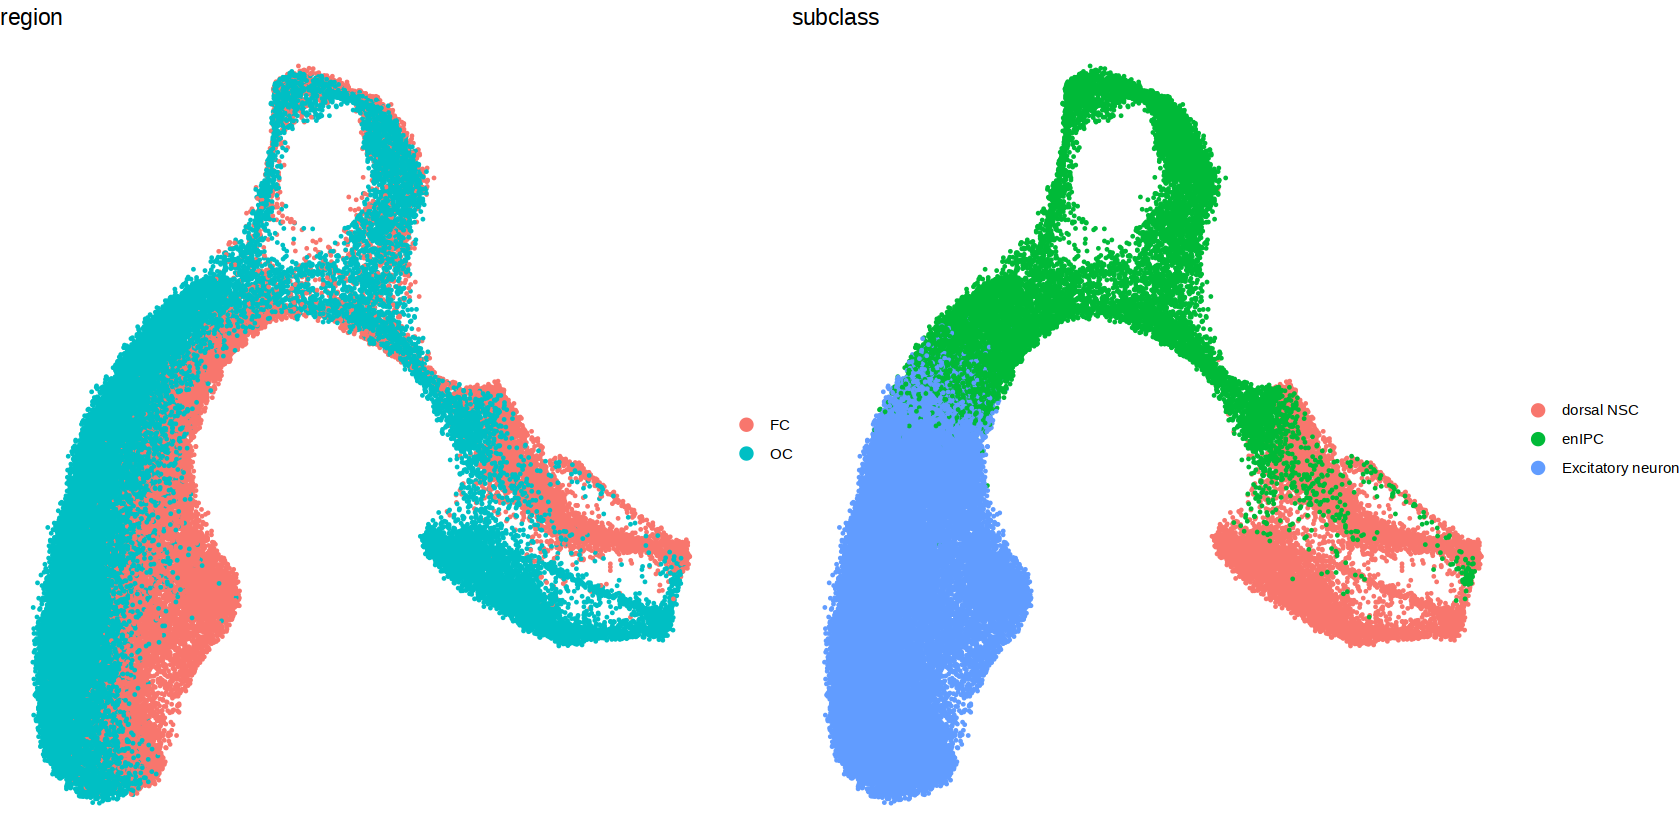

In [7]:
p1 <- DimPlot(early, group.by = c("region", "subclass"), pt.size = 0.3) &
        theme_void()
options(repr.plot.width=14, repr.plot.height=7)
p1

In [8]:
late_cells <- colnames(mac)[(mac$cbnage %in% "E77-78" & 
                             mac$subclass %in% c("dorsal NSC") &
                             mac$region %in% c("FC", "OC")) | 
                            (mac$cbnage %in% "E93" & 
                             mac$subclass %in% c("Excitatory neurons", "enIPC") &
                             mac$area %in% c("DFC", "V1C"))]


late <- mac[, late_cells]
late <- RunUMAP(late, dims = 1:30, reduction = "mnn")

13:31:46 UMAP embedding parameters a = 0.9922 b = 1.112

13:31:46 Read 29002 rows and found 30 numeric columns

13:31:46 Using Annoy for neighbor search, n_neighbors = 30

13:31:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:31:51 Writing NN index file to temp file /tmp/RtmplybkGk/file1aa6e3823e4

13:31:51 Searching Annoy index using 1 thread, search_k = 3000

13:32:02 Annoy recall = 100%

13:32:02 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:32:04 Initializing from normalized Laplacian + noise (using irlba)

13:32:05 Commencing optimization for 200 epochs, with 1356278 positive edges

13:32:46 Optimization finished



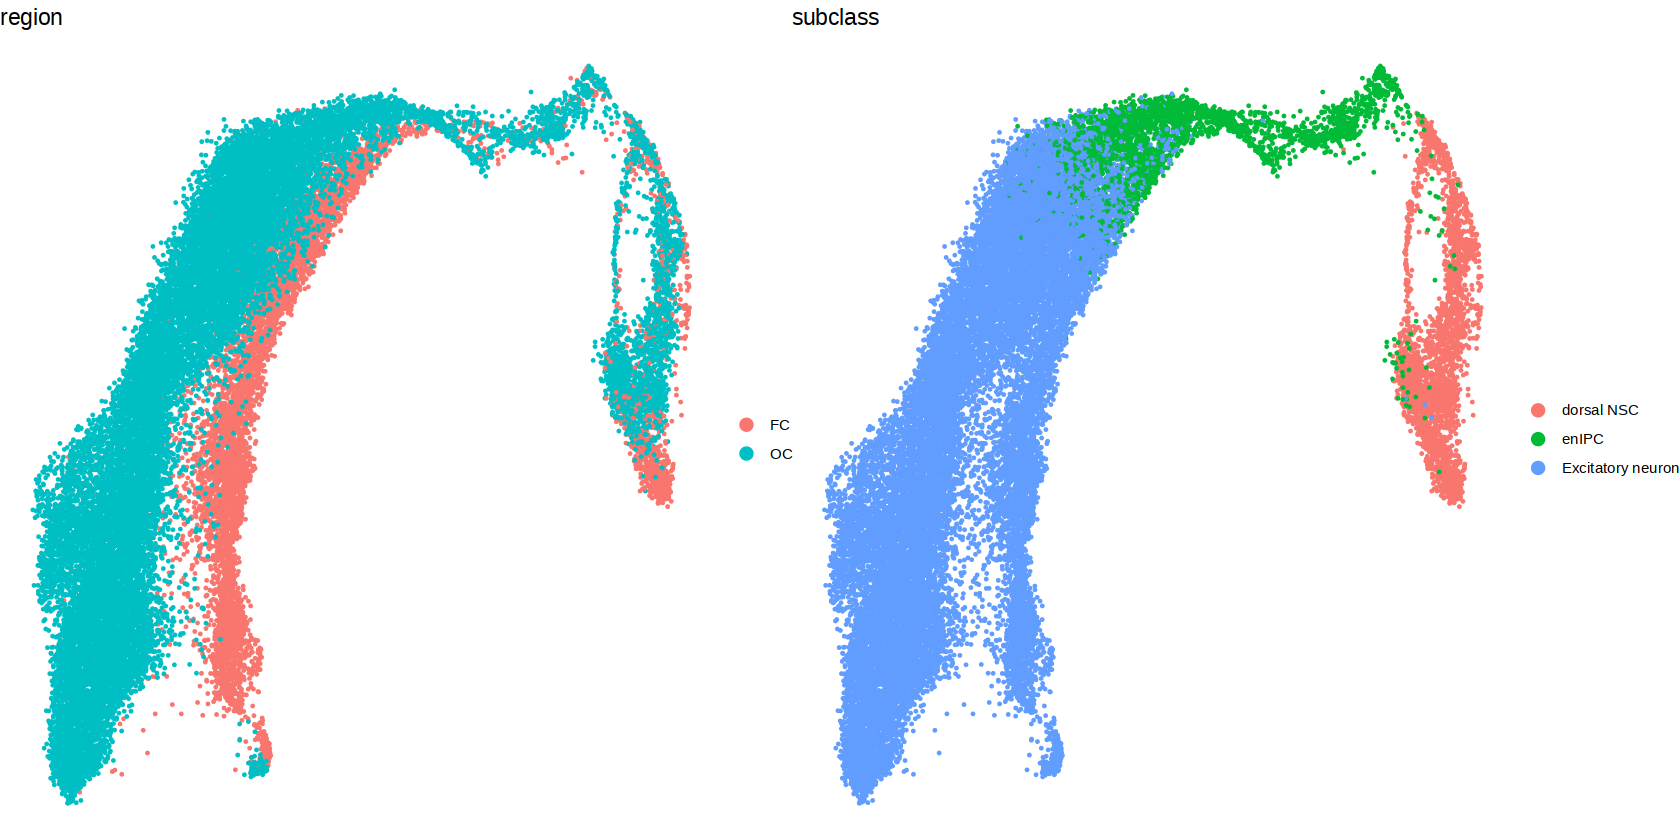

In [9]:
p2 <- DimPlot(late, group.by = c("region", "subclass"), pt.size = 0.3)&
        theme_void()
options(repr.plot.width=14, repr.plot.height=7)
p2

In [10]:
## Store data
save(early, late, file = "./load_files/InVivo_seurat_data_v3.Rdata")

In [13]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-4.1.0/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-4.1.0/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.1.2    ggplot2_3.4.0      dplyr_1.0.10       SeuratObject_4.1.3
[5] Seurat_4.3.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16             colorspace_2.0-